#### Import Packages :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandasql import sqldf
from functools import reduce

pd.set_option('display.max_rows', 200)
print('Packages Loaded')

mysql = lambda q: sqldf(q, globals())

Packages Loaded


#### Read CSV File :

In [2]:
Crime_Data = pd.read_csv('Clean_Boston_Crime_Data.csv')
Crime_Data = Crime_Data.astype({'Code':'int32', 'Offense':'string', 'Date':'datetime64[ns]', 'Year':'int32', 'Month':'int32', 'Lat':'float64', 'Long':'float64'})
Crime_Data.sort_values(by = ['Date'], inplace = True)
Crime_Data

,Code,Offense,Date,Year,Month,Lat,Long
157611,2670,Harassment/ criminal harassment,2019-01-01,2019,1,42.297555,-71.059709
157845,1402,Vandalism,2019-01-01,2019,1,42.377499,-71.058774
148969,1106,Fraud - credit card / atm fraud,2019-01-01,2019,1,42.351935,-71.060486
157768,1107,Fraud - impersonation,2019-01-01,2019,1,42.341288,-71.054679
147870,1106,Fraud - credit card / atm fraud,2019-01-01,2019,1,42.339542,-71.069409
...,...,...,...,...,...,...,...
158098,2905,Val - violation of auto law,2022-04-15,2022,4,42.343960,-71.065930
158097,3114,Investigate property,2022-04-15,2022,4,42.362903,-71.137378
158096,2907,Val - operating after rev/susp.,2022-04-15,2022,4,42.312158,-71.070568
158095,3802,M/v accident - property damage,2022-04-15,2022,4,42.349322,-71.072102


#### Finding Crimes to be plotted :

In [3]:
query = '''
SELECT Code, Offense, COUNT(Code) FROM Crime_Data
GROUP BY Code
ORDER BY COUNT(Code) DESC
''' 
mysql(query)

,Code,Offense,COUNT(Code)
0,3115,Investigate person,14963
1,3831,M/v - leaving scene - property damage,10441
2,3005,Sick assist,10048
3,3114,Investigate property,8380
4,1402,Vandalism,8032
5,3410,Towed motor vehicle,7291
6,801,Assault - simple,6905
7,614,Larceny theft from mv - non-accessory,5625
8,3006,Sick/injured/medical - person,5602
9,613,Larceny shoplifting,5592


##### Here, we choose the following 5 crimes :
1. Assault
2. Fraud
3. Drugs
4. Vandalism

#### Line Graph Dataframe Creation :

In [4]:
query = '''
SELECT Date, Count(Offense) AS "Count_F"
FROM Crime_Data
WHERE Offense LIKE "%Fraud%"
GROUP BY Date
ORDER BY Date
'''
Fraud = mysql(query)
Fraud

,Date,Count_F
0,2019-01-01 00:00:00.000000,7
1,2019-01-10 00:00:00.000000,1
2,2019-01-17 00:00:00.000000,1
3,2019-01-21 00:00:00.000000,1
4,2019-02-01 00:00:00.000000,1
...,...,...
995,2022-04-10 00:00:00.000000,1
996,2022-04-11 00:00:00.000000,10
997,2022-04-12 00:00:00.000000,6
998,2022-04-13 00:00:00.000000,3


In [5]:
query = '''
SELECT Date, Count(Offense) AS "Count_A"
FROM Crime_Data
WHERE Offense LIKE "%Assault%"
GROUP BY Date
ORDER BY Date
'''
Assault = mysql(query)
Assault

,Date,Count_A
0,2019-01-02 00:00:00.000000,2
1,2019-01-16 00:00:00.000000,1
2,2019-01-19 00:00:00.000000,1
3,2019-01-21 00:00:00.000000,1
4,2019-02-20 00:00:00.000000,1
...,...,...
971,2022-04-10 00:00:00.000000,11
972,2022-04-11 00:00:00.000000,10
973,2022-04-12 00:00:00.000000,11
974,2022-04-13 00:00:00.000000,16


In [6]:
query = '''
SELECT Date, Count(Offense) AS "Count_D"
FROM Crime_Data
WHERE Offense LIKE "%Drugs%"
GROUP BY Date
ORDER BY Date
'''
Drugs = mysql(query)
Drugs

,Date,Count_D
0,2019-02-08 00:00:00.000000,1
1,2019-03-01 00:00:00.000000,1
2,2019-03-10 00:00:00.000000,1
3,2019-03-15 00:00:00.000000,1
4,2019-03-23 00:00:00.000000,1
...,...,...
857,2022-04-09 00:00:00.000000,2
858,2022-04-11 00:00:00.000000,5
859,2022-04-12 00:00:00.000000,1
860,2022-04-13 00:00:00.000000,4


In [7]:
query = '''
SELECT Date, Count(Offense) AS "Count_V"
FROM Crime_Data
WHERE Offense LIKE "%Vandalism%"
GROUP BY Date
ORDER BY Date
'''
Vandalism = mysql(query)
Vandalism

,Date,Count_V
0,2019-01-01 00:00:00.000000,1
1,2019-01-23 00:00:00.000000,1
2,2019-03-01 00:00:00.000000,1
3,2019-04-16 00:00:00.000000,1
4,2019-05-01 00:00:00.000000,1
...,...,...
943,2022-04-10 00:00:00.000000,3
944,2022-04-11 00:00:00.000000,10
945,2022-04-12 00:00:00.000000,5
946,2022-04-13 00:00:00.000000,8


In [8]:
frames = [Assault, Fraud, Drugs, Vandalism]
Plot_df = reduce(lambda  left,right: pd.merge(left, right, on=['Date'], how='outer'), frames).dropna()
Plot_df.Date = pd.to_datetime(Plot_df.Date).dt.normalize()
Plot_df.set_index('Date', inplace = True)
Plot_df

,Count_A,Count_F,Count_D,Count_V
Date,,,,
2019-09-12,1.0,1.0,1.0,1.0
2019-09-26,2.0,4.0,1.0,2.0
2019-09-27,4.0,6.0,2.0,4.0
2019-09-29,16.0,4.0,3.0,18.0
2019-09-30,16.0,8.0,10.0,9.0
...,...,...,...,...
2022-04-09,14.0,2.0,2.0,10.0
2022-04-11,10.0,10.0,5.0,10.0
2022-04-12,11.0,6.0,1.0,5.0


Here, we assume that the officers were getting used to the new database crime record system and **ignore the first nine months of 2019** and since April 2022 was partly over when this database was retrieved, we **ignore April 2022**

In [9]:
Plot_df = Plot_df[8:-1]
Plot_df

,Count_A,Count_F,Count_D,Count_V
Date,,,,
2019-10-04,19.0,17.0,7.0,6.0
2019-10-05,21.0,6.0,6.0,12.0
2019-10-06,17.0,4.0,4.0,10.0
2019-10-07,21.0,14.0,7.0,6.0
2019-10-08,19.0,6.0,5.0,4.0
...,...,...,...,...
2022-04-08,14.0,5.0,4.0,12.0
2022-04-09,14.0,2.0,2.0,10.0
2022-04-11,10.0,10.0,5.0,10.0


#### Plotting Line Graph :

Text(0, 0.5, 'Crime Incidents')

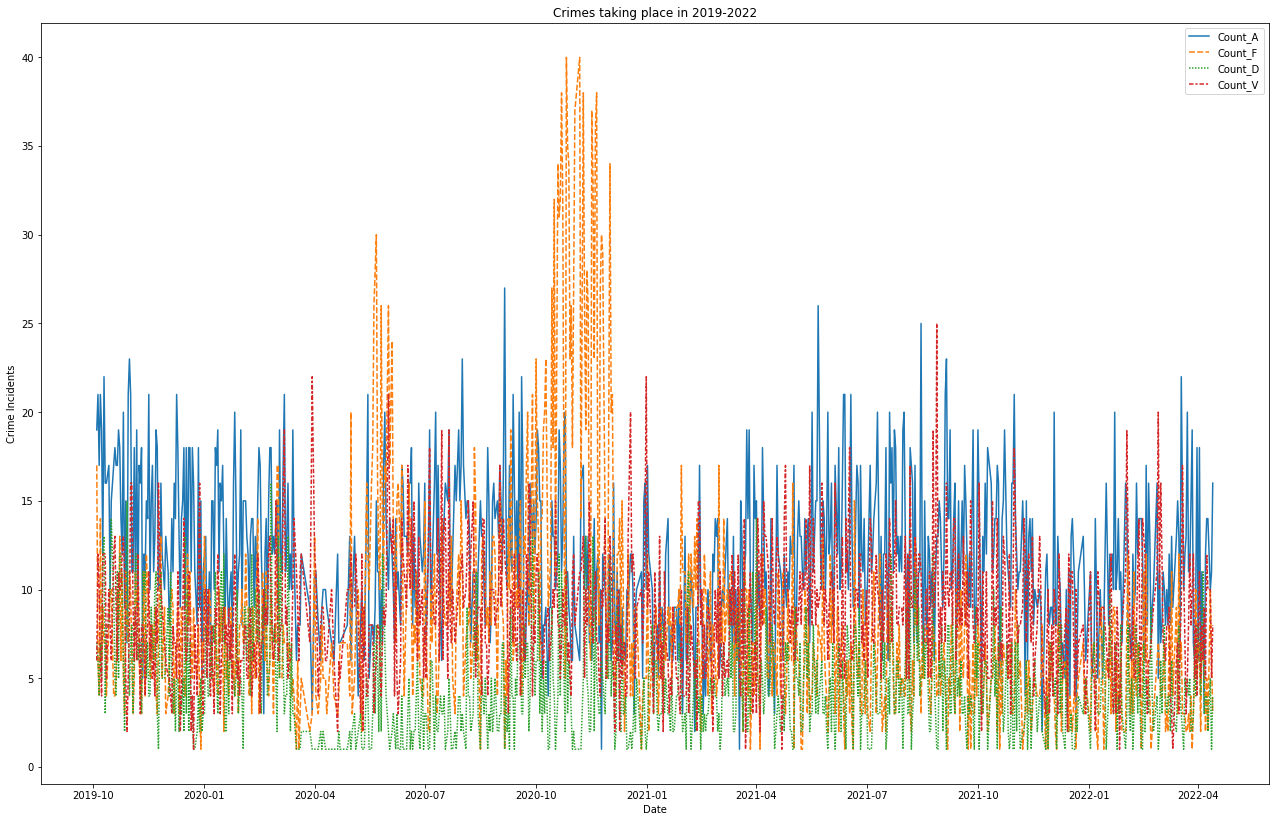

In [11]:
plt.figure(figsize = (22,14))
plt.title('Crimes taking place in 2019-2022')
sns.lineplot(data = Plot_df)
plt.ylabel('Crime Incidents')

#### Scatter Plot Dataframe Creation :

In [12]:
Fraud1 = Fraud
Fraud1.rename(columns = {'Count_F':'Count'}, inplace = True)
Fraud1['Offense'] = 'Fraud'

Assault1 = Assault
Assault1.rename(columns = {'Count_A':'Count'}, inplace = True)
Assault1['Offense'] = 'Assault'

Drugs1 = Drugs
Drugs1.rename(columns = {'Count_D':'Count'}, inplace = True)
Drugs1['Offense'] = 'Drugs'

Vandalism1 = Vandalism
Vandalism1.rename(columns = {'Count_V':'Count'}, inplace = True)
Vandalism1['Offense'] = 'Vandalism'

frames = [Assault1, Fraud1, Drugs1, Vandalism1]
SPlot_df = pd.concat(frames)

In [13]:
SPlot_df.Date = pd.to_datetime(SPlot_df.Date).dt.normalize()
SPlot_df.sort_values(by = 'Date', inplace = True)
SPlot_df.reset_index(inplace = True, drop = True)
SPlot_df

,Date,Count,Offense
0,2019-01-01,7,Fraud
1,2019-01-01,1,Vandalism
2,2019-01-02,2,Assault
3,2019-01-10,1,Fraud
4,2019-01-16,1,Assault
...,...,...,...
3781,2022-04-13,3,Fraud
3782,2022-04-14,16,Assault
3783,2022-04-14,1,Fraud
3784,2022-04-14,5,Drugs


In [14]:
SPlot_df.to_csv('Scatterplot.csv')

#### Plotting Scatter Plot :

<AxesSubplot:xlabel='Date', ylabel='Count'>

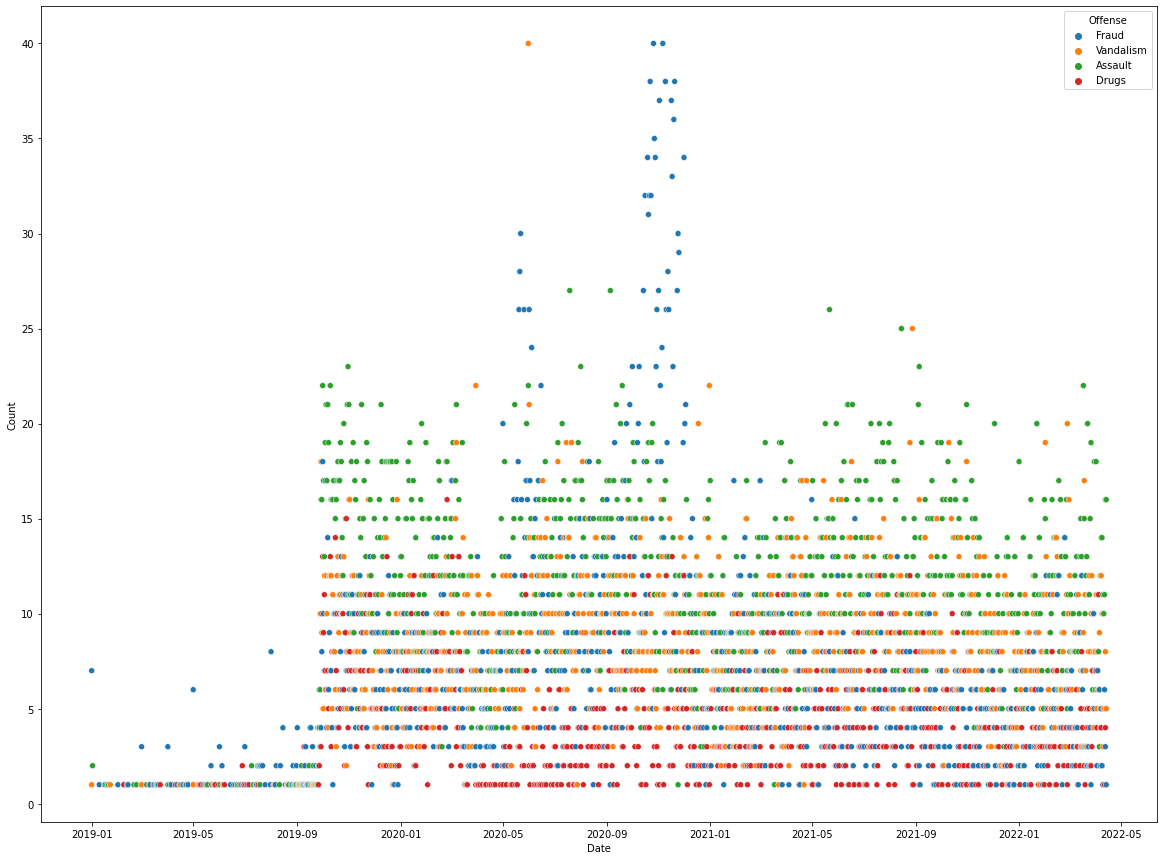

In [15]:
plt.figure(figsize = (20, 15))
sns.scatterplot(x = SPlot_df.Date, y = SPlot_df.Count, hue = SPlot_df.Offense)